# Statistics

In [1]:
import random
import numpy as np
import scipy.stats as st
import pandas as pd
import warnings
import itertools

import matplotlib.pyplot as plt
from matplotlib.figure import Figure
from matplotlib.axes import Axes
from mpl_toolkits.mplot3d import Axes3D

warnings.filterwarnings("ignore")

## Relationship between Sample & Population metrics

#### Popultation Mean

$$ \mu = \sum_{i=1}^{n}{ X_i } $$

#### Popultation Variance

$$ σ^2 = \frac{ \sum_{i=1}^{n}{(Xi - \mu)^2} }{n} $$

#### Estimation of Population Mean using the Mean of Sample Means

$$ \mu \sim \overline{x} = \sum_{i=1}^{n}{ \overline{X_i} } $$

#### Estimation of Population Variance using the Variance of Sample Means

$$ \frac{ σ^2 }{n} \sim S^2_{\overline{X}} = \frac{ \sum_{i=1}^{n}{(\overline{Xi} - \overline{\overline{X}})^2} }{n} $$

#### Estimation of Population Variance using the Mean of Sample Variances

$$ σ^2 \times \frac{ (n - 1) }{n} \sim \overline{X_{S^2}} = \frac{ \sum_{i=1}^{n}{ S^2_i }}{n} $$

In [9]:
def approximate(sample_size: int = 3, population_size: int = 10, total_samples: int = -1) -> dict:
    assert sample_size < population_size
    Z: dict = {}
    Z['population_size'] = population_size
    Z['sample_size'] = sample_size
    Z['population_size'] = population_size
    # Population metrics
    population: np.array = np.linspace(0, 100, population_size)
    Z['population_mean'] = np.mean(population)
    Z['population_var'] = np.var(population)
    # Sample metrics
    means: list = []
    variances: list = []
    for sample in itertools.combinations(population, sample_size):
        means.append(np.mean(sample))
        variances.append(np.var(sample))
    means = np.array(means)
    np.random.shuffle(means)
    means = means[:total_samples]
    variances = np.array(variances)
    np.random.shuffle(variances)
    variances = variances[:total_samples]
    Z['observations'] = means.shape[0]
    Z['mean_of_means'] = np.mean(means)
    Z['mean_of_variances'] = np.mean(variances)
    Z['variance_of_means'] = np.var(means)
    return Z

### Approximating Population metrics as Population Size increases

5 10 15 20 25 30 35 40 45 50 55 60 65 70 75 

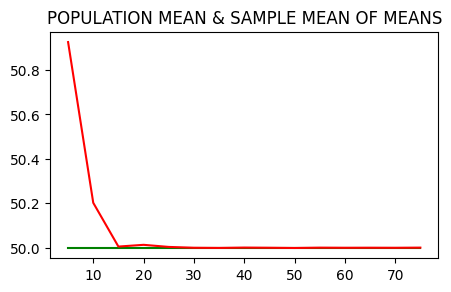

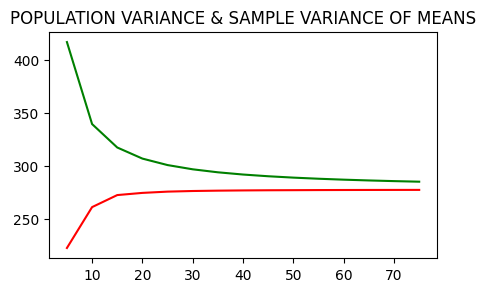

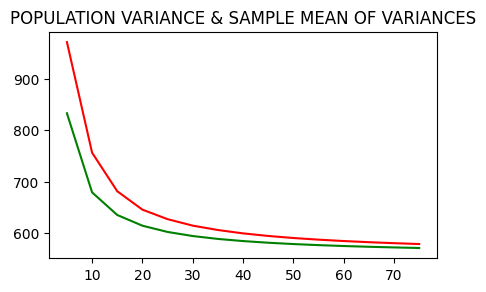

In [3]:
X: list = []
sample_mean_of_means: list = []
population_means: list = []
sample_mean_of_variances: list = []
population_vars1: list = []
population_vars2: list = []
sample_variance_of_means: list = []

for population_size in range(5, 80, 5):
    print(population_size, end=' ')
    z: dict = approximate(sample_size=3, population_size=population_size, total_samples=-1)
    X.append(population_size)
    population_means.append(z['population_mean'])
    population_vars1.append(z['population_var'] / z['sample_size'])
    population_vars2.append(z['population_var'] * (z['sample_size'] - 1) / z['sample_size'])
    sample_mean_of_variances.append(z['mean_of_variances'])
    sample_mean_of_means.append(z['mean_of_means'])
    sample_variance_of_means.append(z['variance_of_means'])

# Approximating Population Mean using Sample Mean of Means
figure: Figure = plt.figure(dpi=100, figsize=(5, 3))
axes: Axes = figure.add_subplot()
axes.plot(X, population_means, color='green')
axes.plot(X, sample_mean_of_means, color='red')
axes.set_title('POPULATION MEAN & SAMPLE MEAN OF MEANS')
figure.show()

# Approximating Population Variance using Sample Mean of Variances
figure: Figure = plt.figure(dpi=100, figsize=(5, 3))
axes: Axes = figure.add_subplot()
axes.plot(X, population_vars1, color='green')
axes.plot(X, sample_variance_of_means, color='red')
axes.set_title('POPULATION VARIANCE & SAMPLE VARIANCE OF MEANS')
figure.show()

# Approximating Population Variance using Sample Mean of Variances
figure: Figure = plt.figure(dpi=100, figsize=(5, 3))
axes: Axes = figure.add_subplot()
axes.plot(X, population_vars2, color='green')
axes.plot(X, sample_mean_of_variances, color='red')
axes.set_title('POPULATION VARIANCE & SAMPLE MEAN OF VARIANCES')
figure.show()

### Approximating Population metrics as Sample Size increases

3 4 5 6 7 8 

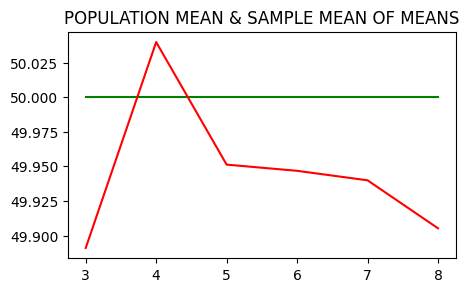

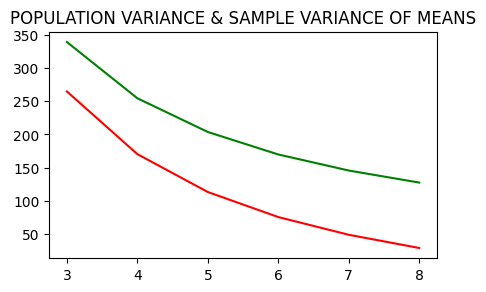

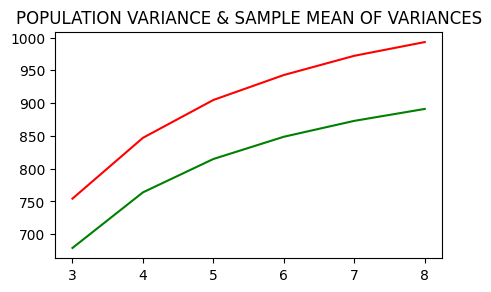

In [11]:
X: list = []
sample_mean_of_means: list = []
population_means: list = []
sample_mean_of_variances: list = []
population_vars1: list = []
population_vars2: list = []
sample_variance_of_means: list = []

for sample_size in range(3, 9):
    print(sample_size, end=' ')
    z: dict = approximate(sample_size=sample_size, population_size=10, total_samples=-1)
    X.append(sample_size)
    population_means.append(z['population_mean'])
    population_vars1.append(z['population_var'] / z['sample_size'])
    population_vars2.append(z['population_var'] * (z['sample_size'] - 1) / z['sample_size'])
    sample_mean_of_variances.append(z['mean_of_variances'])
    sample_mean_of_means.append(z['mean_of_means'])
    sample_variance_of_means.append(z['variance_of_means'])

# Approximating Population Mean using Sample Mean of Means
figure: Figure = plt.figure(dpi=100, figsize=(5, 3))
axes: Axes = figure.add_subplot()
axes.plot(X, population_means, color='green')
axes.plot(X, sample_mean_of_means, color='red')
axes.set_title('POPULATION MEAN & SAMPLE MEAN OF MEANS')
figure.show()

# Approximating Population Variance using Sample Mean of Variances
figure: Figure = plt.figure(dpi=100, figsize=(5, 3))
axes: Axes = figure.add_subplot()
axes.plot(X, population_vars1, color='green')
axes.plot(X, sample_variance_of_means, color='red')
axes.set_title('POPULATION VARIANCE & SAMPLE VARIANCE OF MEANS')
figure.show()

# Approximating Population Variance using Sample Mean of Variances
figure: Figure = plt.figure(dpi=100, figsize=(5, 3))
axes: Axes = figure.add_subplot()
axes.plot(X, population_vars2, color='green')
axes.plot(X, sample_mean_of_variances, color='red')
axes.set_title('POPULATION VARIANCE & SAMPLE MEAN OF VARIANCES')
figure.show()

### Approximating Population metrics as Amount of Samples increases

3 4 5 6 7 8 

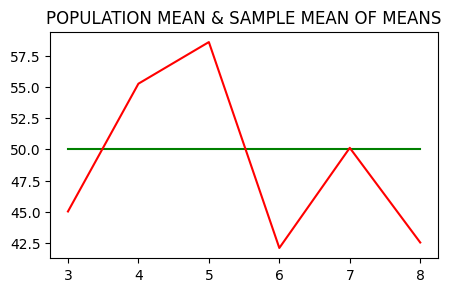

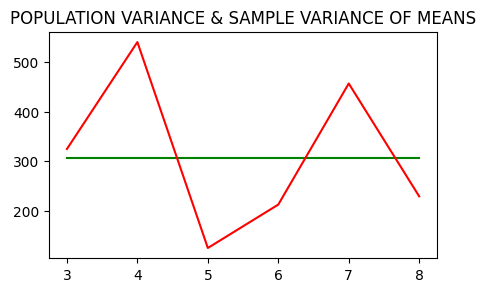

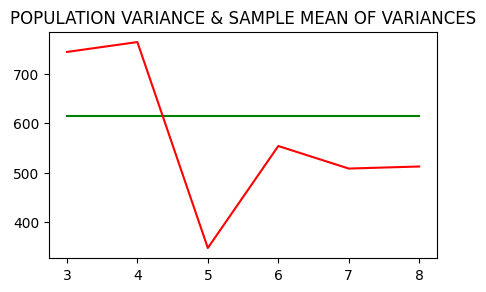

In [14]:
X: list = []
sample_mean_of_means: list = []
population_means: list = []
sample_mean_of_variances: list = []
population_vars1: list = []
population_vars2: list = []
sample_variance_of_means: list = []

for total_samples in range(3, 9):
    print(total_samples, end=' ')
    z: dict = approximate(sample_size=3, population_size=20, total_samples=total_samples)
    X.append(total_samples)
    population_means.append(z['population_mean'])
    population_vars1.append(z['population_var'] / z['sample_size'])
    population_vars2.append(z['population_var'] * (z['sample_size'] - 1) / z['sample_size'])
    sample_mean_of_variances.append(z['mean_of_variances'])
    sample_mean_of_means.append(z['mean_of_means'])
    sample_variance_of_means.append(z['variance_of_means'])

# Approximating Population Mean using Sample Mean of Means
figure: Figure = plt.figure(dpi=100, figsize=(5, 3))
axes: Axes = figure.add_subplot()
axes.plot(X, population_means, color='green')
axes.plot(X, sample_mean_of_means, color='red')
axes.set_title('POPULATION MEAN & SAMPLE MEAN OF MEANS')
figure.show()

# Approximating Population Variance using Sample Mean of Variances
figure: Figure = plt.figure(dpi=100, figsize=(5, 3))
axes: Axes = figure.add_subplot()
axes.plot(X, population_vars1, color='green')
axes.plot(X, sample_variance_of_means, color='red')
axes.set_title('POPULATION VARIANCE & SAMPLE VARIANCE OF MEANS')
figure.show()

# Approximating Population Variance using Sample Mean of Variances
figure: Figure = plt.figure(dpi=100, figsize=(5, 3))
axes: Axes = figure.add_subplot()
axes.plot(X, population_vars2, color='green')
axes.plot(X, sample_mean_of_variances, color='red')
axes.set_title('POPULATION VARIANCE & SAMPLE MEAN OF VARIANCES')
figure.show()